In [1]:
import pandas as pd

In [1]:
df = pd.read_csv('car data.csv')

NameError: name 'pd' is not defined

In [2]:
df.head()

NameError: name 'df' is not defined

In [3]:
df.shape

NameError: name 'df' is not defined

In [4]:
print(df['Seller_Type'].unique())

NameError: name 'df' is not defined

In [5]:
print(df['Transmission'].unique())
print(df['Owner'].unique())

NameError: name 'df' is not defined

In [6]:
# check missing values or null values

In [7]:
df.isnull().sum()  # print count of null values...so there are no null values .

NameError: name 'df' is not defined

In [1]:
df.describe()

NameError: name 'df' is not defined

In [ ]:
df.columns

In [2]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]                 # removed car name since not big effect


NameError: name 'df' is not defined

In [3]:
final_dataset.head()

NameError: name 'final_dataset' is not defined

In [1]:
#  derive new features based on the existing features

In [2]:
final_dataset['Current_Year'] = 2020

NameError: name 'final_dataset' is not defined

In [ ]:
final_dataset.head()

In [3]:
final_dataset['no_year'] = final_dataset['Current_Year'] - final_dataset['Year']

NameError: name 'final_dataset' is not defined

In [4]:
final_dataset.head()

NameError: name 'final_dataset' is not defined

In [5]:
# now year and current year is not required so drop...

In [101]:
final_dataset.drop(['Year','Current_Year'],axis=1,inplace=True)

In [102]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [103]:
# just for understanding how get_dummies applies one hot encoding
'''
import pandas as pd

data = {'Gender': ['Male', 'Female', 'Male', 'Female'],
        'City': ['New York', 'Paris', 'London', 'Paris']}
df = pd.DataFrame(data)
final_dataset = pd.get_dummies(df, drop_first=True)
print(final_dataset)

     Gender      City
0    Male   New York
1  Female      Paris
2    Male     London
3  Female      Paris

   Gender_Male  City_London  City_New York
0            1            0              1
1            0            0              0
2            1            1              0
3            0            0              0

'''


"\nimport pandas as pd\n\ndata = {'Gender': ['Male', 'Female', 'Male', 'Female'],\n        'City': ['New York', 'Paris', 'London', 'Paris']}\ndf = pd.DataFrame(data)\nfinal_dataset = pd.get_dummies(df, drop_first=True)\nprint(final_dataset)\n\n     Gender      City\n0    Male   New York\n1  Female      Paris\n2    Male     London\n3  Female      Paris\n\n   Gender_Male  City_London  City_New York\n0            1            0              1\n1            0            0              0\n2            1            1              0\n3            0            0              0\n\n"

In [157]:
has_nan = df.isnull().values.any()
has_nan

False

In [104]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [105]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True).astype(int)

In [106]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,6,0,1,0,1
1,4,9,43000,0,7,1,0,0,1
2,7,9,6900,0,3,0,1,0,1
3,2,4,5200,0,9,0,1,0,1
4,4,6,42450,0,6,1,0,0,1


In [107]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.877518,0.032597,-0.083877,-0.229302,0.547371,-0.535179,-0.542332,-0.367935
Present_Price,0.877518,1.000000,0.206896,0.007089,0.049269,0.472090,-0.464390,-0.515092,-0.349275
Kms_Driven,0.032597,0.206896,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.083877,0.007089,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.229302,0.049269,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.547371,0.472090,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.535179,-0.464390,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.542332,-0.515092,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367935,-0.349275,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [108]:
import seaborn as sns

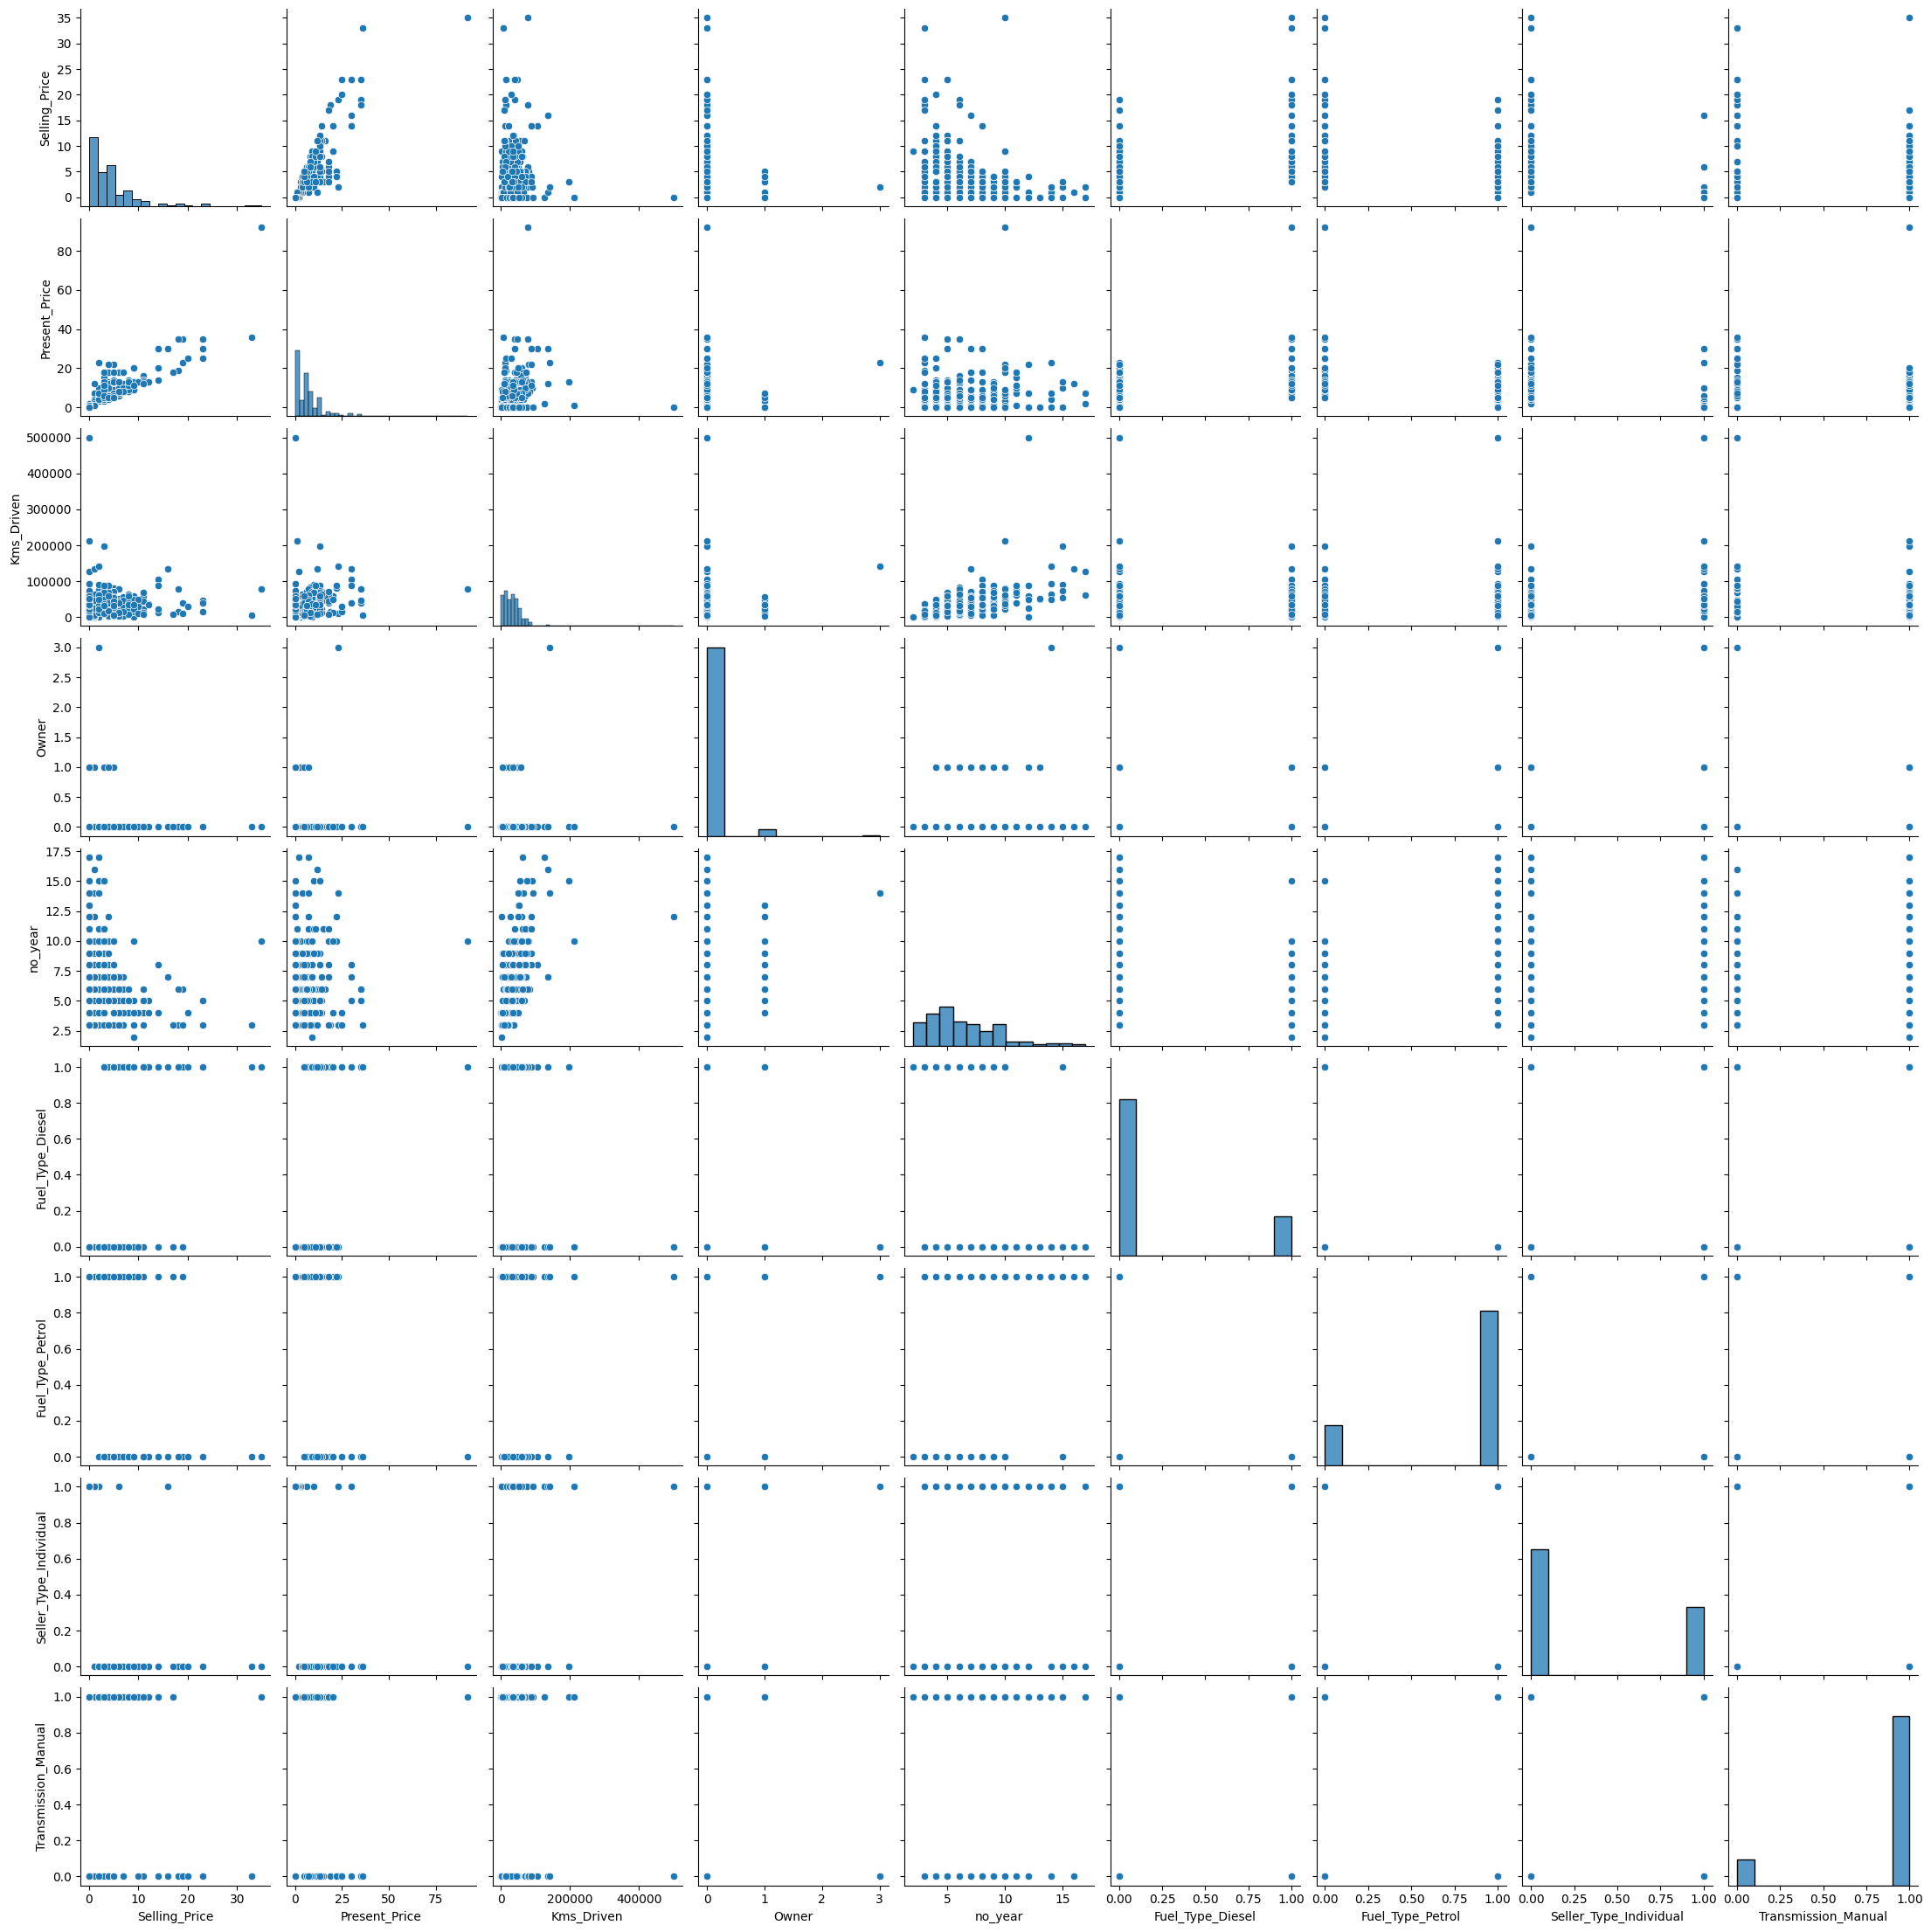

In [109]:
sns.pairplot(final_dataset)

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

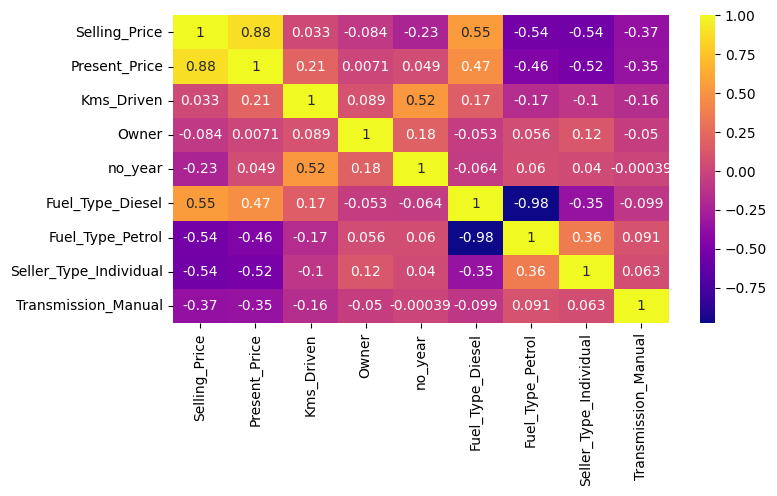

In [111]:
cormat = final_dataset.corr()
top_corr_features = cormat.index
plt.figure(figsize=(8,4))
g= sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='plasma')

In [112]:
final_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,6,0,1,0,1
1,4,9,43000,0,7,1,0,0,1


In [113]:
# x is independent feature & y is dependent feature
x = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [118]:
y.head()

0    3
1    4
2    7
3    2
4    4
Name: Selling_Price, dtype: int32

In [121]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [122]:
### Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [124]:
print(model.feature_importances_)

[0.39612275 0.04292982 0.00122659 0.07719208 0.21466759 0.00781528
 0.12867479 0.13137111]


In [125]:
#  so present price is having highest importance

In [126]:
# ploting features for better visualization

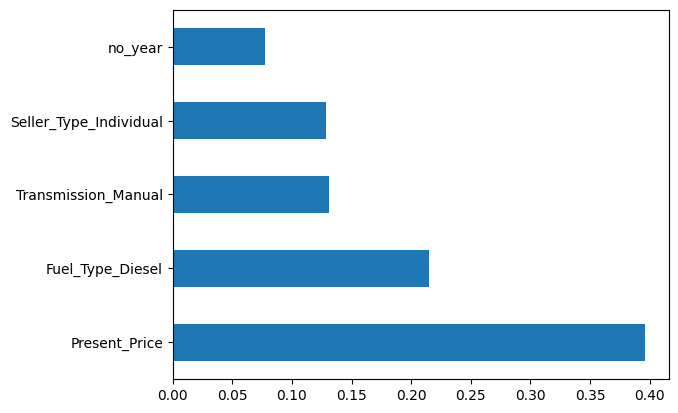

In [127]:
feat_importa = pd.Series(model.feature_importances_,index=x.columns)
feat_importa.nlargest(5).plot(kind='barh')
plt.show()

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [131]:
x_train.shape

(240, 8)

In [132]:
x_test.shape

(61, 8)

In [133]:
from sklearn.ensemble import RandomForestRegressor


In [134]:
#  hyperparameters

In [141]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [142]:
from sklearn.model_selection import RandomizedSearchCV  # will find best parameters 

In [170]:

# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Number of features to consider at every split
max_features = ['sqrt', 0.5]  
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# The n_estimators range can remain the same
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [171]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 0.5], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [172]:
rf = RandomForestRegressor()

In [174]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [175]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 0.5],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [176]:
predictions = rf_random.predict(x_test)
predictions

array([8.5600e-01, 2.3750e+00, 5.6470e+00, 8.3260e+00, 7.2410e+00,
       2.5000e-02, 1.9000e-02, 8.0000e-03, 3.2550e+00, 2.9340e+00,
       8.7000e+00, 4.5680e+00, 1.0000e-02, 1.8000e-02, 2.6690e+00,
       6.9000e-02, 5.4700e+00, 8.1870e+00, 6.0000e-03, 3.8790e+00,
       4.4370e+00, 9.2700e-01, 3.9790e+00, 1.4000e-02, 9.9900e-01,
       8.4570e+00, 3.7970e+00, 8.0300e+00, 3.6360e+00, 2.1578e+01,
       7.3000e-02, 2.4940e+00, 1.0287e+01, 5.2890e+00, 6.9260e+00,
       1.7120e+00, 4.3970e+00, 4.1940e+00, 3.8000e-02, 4.2460e+00,
       3.1000e-02, 3.8830e+00, 7.0000e-03, 8.7930e+00, 9.7100e-01,
       1.5518e+01, 7.6890e+00, 3.7470e+00, 2.0000e-01, 5.7220e+00,
       1.2764e+01, 2.0970e+00, 4.2500e+00, 8.1100e+00, 1.0621e+01,
       2.5000e-02, 4.3240e+00, 2.2960e+00, 3.1410e+00, 4.2160e+00,
       5.4570e+00])

<Axes: xlabel='Selling_Price', ylabel='Count'>

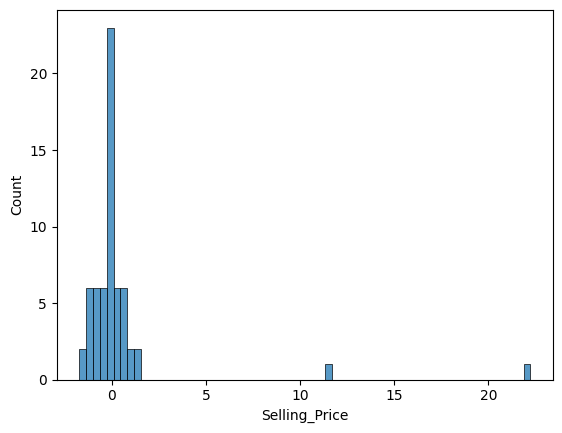

In [178]:
sns.histplot(y_test-predictions)

<Axes: xlabel='Selling_Price'>

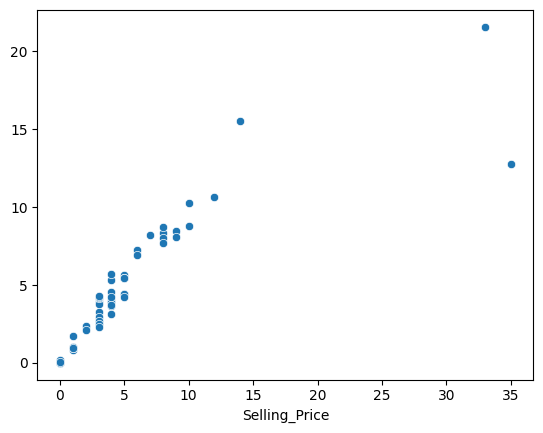

In [184]:
import seaborn as sns
sns.scatterplot(x=y_test,y=predictions)

In [186]:
from sklearn import metrics

In [187]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0237049180327868
MSE: 10.690929573770491
RMSE: 3.269698697704498


In [188]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)